<a href="https://colab.research.google.com/github/PratibhaSanganmath/Credit-Card-Default-Prediction/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Importing libraries

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
pip install --upgrade xlrd

In [23]:
import xlrd

## Lets read the data

In [24]:
df=pd.read_excel('/content/drive/MyDrive/Copy of default of credit card clients.xls',header=1)

In [25]:
df.info() # used to check the Information about the data and the datatypes of each respective attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [26]:
df.shape # Shape of a dataframe gets the number of rows and number of columns of the dataframe

(30000, 25)

In [27]:
df.describe(include="all") #Use describe to compute some summary statistics on the DataFrame.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [28]:
df.describe().T  # to transpose the outcome of describe method

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


There are simply 25 columns ,and all of numeric values

In [29]:
df.head() #Pandas head() method is used to return top n (5 by default) rows of a data frame

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
df.drop('ID',axis=1,inplace=False)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [31]:
df.tail()  #Pandas tail() method is used to return last n (5 by default) rows of a data frame 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [32]:
df.columns # columns present in the dataframe

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [33]:
df.isnull().sum() #number of null values in each column

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

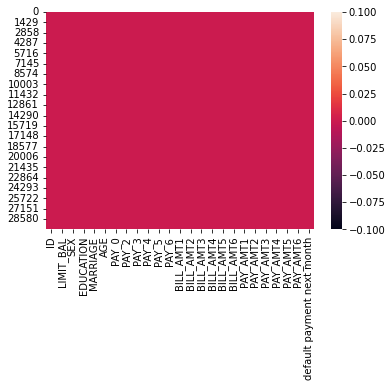

In [34]:
sns.heatmap(df.isnull())

In [35]:
df.duplicated() # checks the duplicated values present in the dataset

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [36]:
len(df[df.duplicated()]) #total no. of duplicates in the dataframe

0

no duplicates in the dataframe

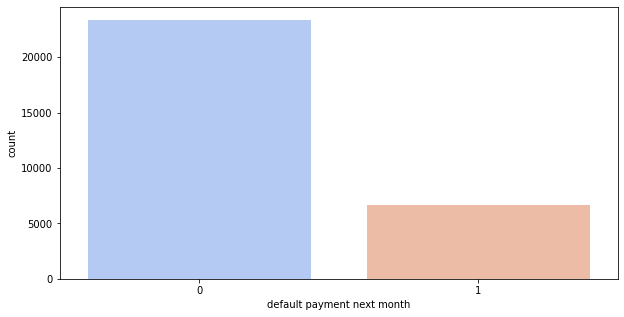

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default payment next month',palette = 'coolwarm', data = df)

From above graph on x-axis 0 indicates as not a default payment and 1 indicates the default payment.From this we can say that for more customers there is no default payments for next month.

In [38]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [39]:
default_pay_on_limit_bal= df[['LIMIT_BAL','default payment next month']].groupby(['LIMIT_BAL'],axis=0).sum().sort_values('LIMIT_BAL', ascending=False).head(15)
default_pay_on_limit_bal.reset_index()

,LIMIT_BAL,default payment next month
0,1000000,0
1,800000,0
2,780000,0
3,760000,0
4,750000,0
5,740000,1
6,730000,0
7,720000,1
8,710000,1
9,700000,0


Text(0.5, 1.0, 'Amount of the given credit (NT dollar)')

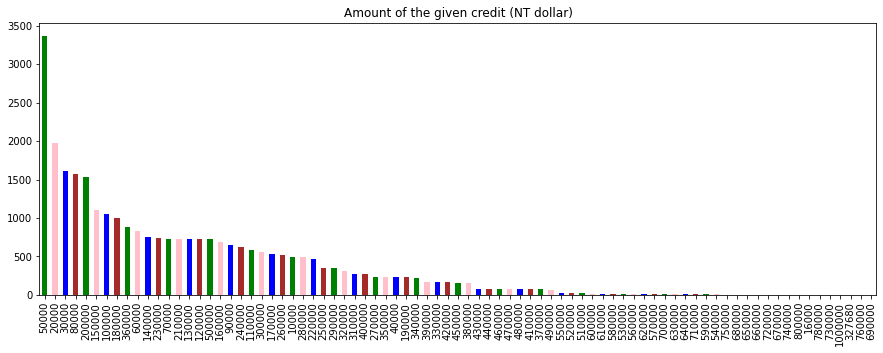

In [40]:
plt.subplots(figsize=(15,5))
df.LIMIT_BAL.value_counts().plot(kind='bar',color=['green','pink','blue','brown'])
plt.title('Amount of the given credit (NT dollar)')

In [75]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'sept_pay',
       'aug_pay', 'july_pay', 'june_pay', 'may_pay', 'april_pay', 'sept_bill',
       'aug_bill', 'july_bill', 'june_bill', 'may_bill', 'april_bill',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [80]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [81]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

1 = graduate school; 2 = university; 3 = high school; 4 = others., from the above we can say that most of the people are university educated followed by graduated school 

Text(0.5, 1.0, 'Education of customers')

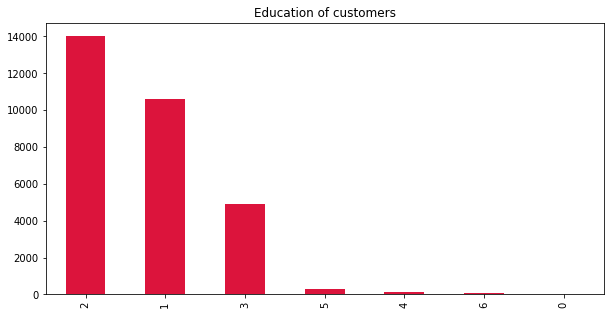

In [43]:
plt.subplots(figsize=(10,5))
df.EDUCATION.value_counts().plot(kind='bar',color='crimson')
plt.title('Education of customers')  #Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

In [44]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

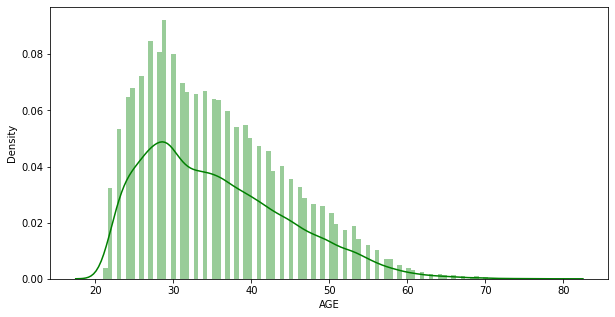

In [45]:
plt.figure(figsize=(10, 5))
sns.distplot(df['AGE'], color='g', bins=100, hist_kws={'alpha': 0.4});

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

In [46]:
df=df.rename(columns={'PAY_0':'sept_pay','PAY_2':'aug_pay','PAY_3':'july_pay','PAY_4':'june_pay','PAY_5':'may_pay','PAY_6':'april_pay'})

In [47]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'sept_pay',
       'aug_pay', 'july_pay', 'june_pay', 'may_pay', 'april_pay', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

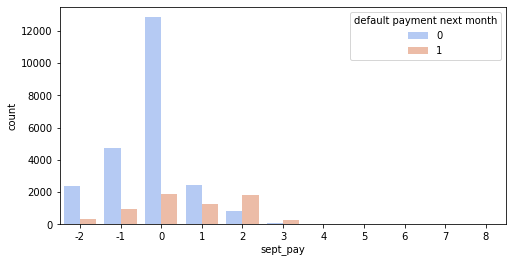

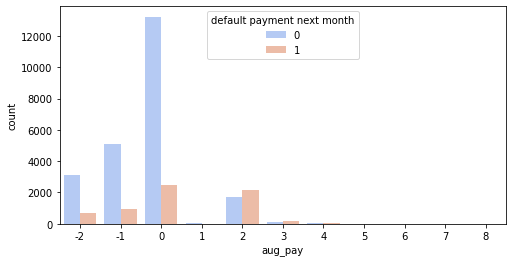

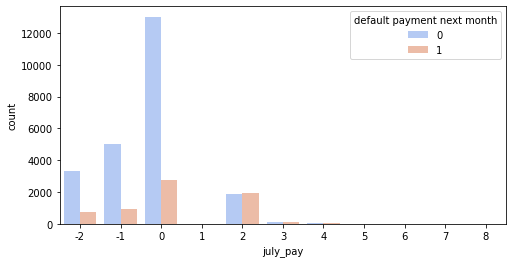

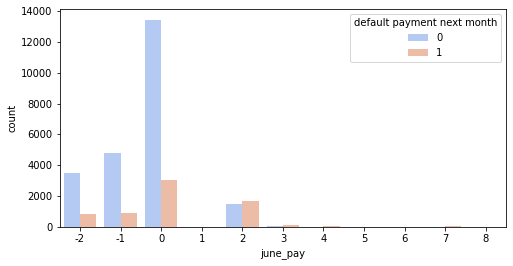

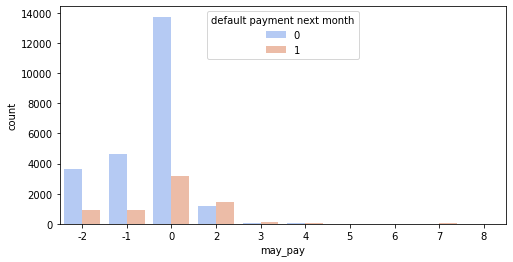

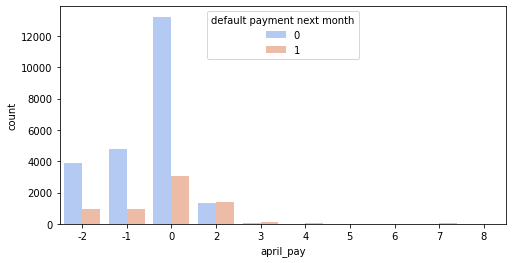

In [74]:
pay_columns = ['sept_pay',	'aug_pay',	'july_pay',	'june_pay',	'may_pay',	'april_pay']
for column in pay_columns:
  plt.figure(figsize=(8,4))
  sns.countplot(x = column, hue = 'default payment next month', palette = 'coolwarm',data = df)


In [49]:
df=df.rename(columns={'BILL_AMT1':'sept_bill','BILL_AMT2':'aug_bill','BILL_AMT3':'july_bill','BILL_AMT4':'june_bill','BILL_AMT5':'may_bill','BILL_AMT6':'april_bill'})

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

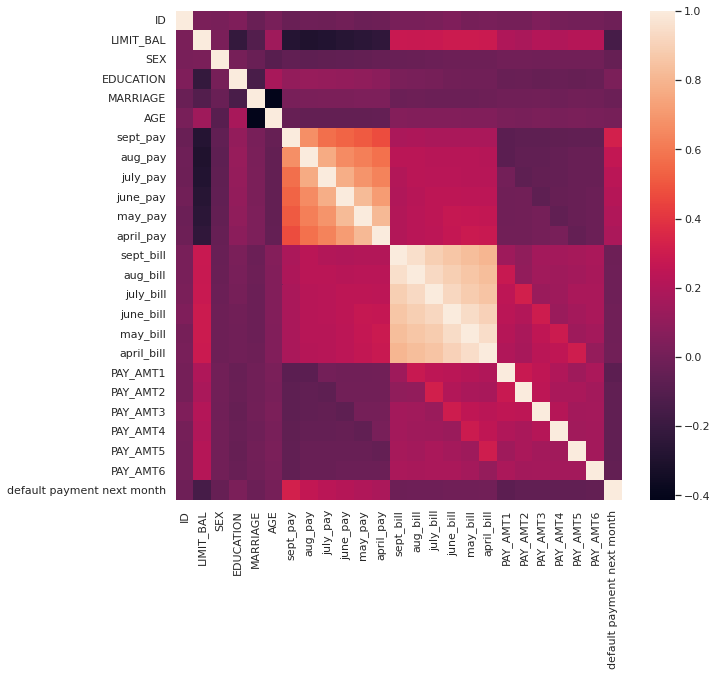

In [85]:
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(df.corr())
plt.show()

In [51]:
# Data for all the independent variables
X = df.drop(labels='default payment next month',axis=1)

# Data for the dependent variable
Y = df['default payment next month']

## Splitting the data into train and test dataset

In [52]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [53]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(22500, 24) (22500,)
(7500, 24) (7500,)


In [54]:
X_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'sept_pay',
       'aug_pay', 'july_pay', 'june_pay', 'may_pay', 'april_pay', 'sept_bill',
       'aug_bill', 'july_bill', 'june_bill', 'may_bill', 'april_bill',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [55]:
X_train.isnull().sum()

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION     0
MARRIAGE      0
AGE           0
sept_pay      0
aug_pay       0
july_pay      0
june_pay      0
may_pay       0
april_pay     0
sept_bill     0
aug_bill      0
july_bill     0
june_bill     0
may_bill      0
april_bill    0
PAY_AMT1      0
PAY_AMT2      0
PAY_AMT3      0
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
dtype: int64

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logis= LogisticRegression()
grid_param={'penalty':['l1','l2'],
             'C':[0.01, 0.1, 1, 10, 100]}
logis_grid = GridSearchCV(logis, grid_param, cv = 5, n_jobs = -1)

In [58]:
# original training dataset
logis_grid.fit(X_train, Y_train)
print('Best Parameters- original', logis_grid.best_params_)
pred_train = logis_grid.predict(X_train)
pred_test = logis_grid.predict(X_test)

Best Parameters- original {'C': 0.01, 'penalty': 'l2'}


In [59]:
logis_org_train_accuracy = accuracy_score(Y_train, pred_train)
logis_org_test_accuracy = accuracy_score(Y_test, pred_test)
logis_org_train_recall = recall_score(Y_train, pred_train)
logis_org_test_recall = recall_score(Y_test, pred_test)
logis_org_train_precision = precision_score(Y_train,pred_train)
logis_org_test_precision = precision_score(Y_test,pred_test)
logis_org_train_confusion_matrix = confusion_matrix(Y_train, pred_train)
logis_org_test_confusion_matrix = confusion_matrix(Y_test, pred_test)

print('best score -trained', logis_grid.best_score_)
print('train accuracy: ', logis_org_train_accuracy)
print('test accuracy: ', logis_org_test_accuracy)
print('train recall', logis_org_train_recall)
print('test recall: ', logis_org_test_recall)
print('train precision: ', logis_org_train_precision)
print('test precision: ', logis_org_test_precision)
print('train confusion matrix: ', logis_org_train_confusion_matrix)
print('test confusion matrix: ', logis_org_test_confusion_matrix)

best score -trained 0.7792
train accuracy:  0.7791555555555556
test accuracy:  0.7776
train recall 0.00020128824476650564
test recall:  0.0
train precision:  0.3333333333333333
test precision:  0.0
train confusion matrix:  [[17530     2]
 [ 4967     1]]
test confusion matrix:  [[5832    0]
 [1668    0]]


[[17530     2]
 [ 4967     1]]


[Text(0, 0.5, 'Not_default'), Text(0, 1.5, 'Default')]

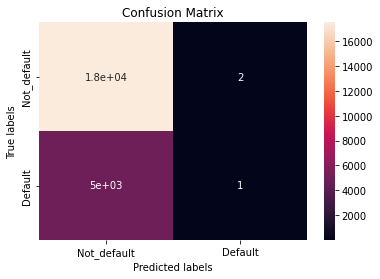

In [60]:
labels = ['Not_default', 'Default']
matrix = confusion_matrix(Y_train,pred_train)
print(matrix)

ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##  SVM

In [61]:
from sklearn.svm import SVC

In [62]:
svc = SVC()
svc.fit(X_train, Y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, Y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.78


In [63]:
logis_org_train_accuracy = accuracy_score(Y_train, pred_train)
logis_org_test_accuracy = accuracy_score(Y_test, pred_test)
logis_org_train_recall = recall_score(Y_train, pred_train)
logis_org_test_recall = recall_score(Y_test, pred_test)
logis_org_train_precision = precision_score(Y_train,pred_train)
logis_org_test_precision = precision_score(Y_test,pred_test)
logis_org_train_confusion_matrix = confusion_matrix(Y_train, pred_train)
logis_org_test_confusion_matrix = confusion_matrix(Y_test, pred_test)

In [64]:
test_accuracy_SVC = accuracy_score(Y_test, pred_test)
test_precision_score_SVC =  precision_score(Y_test,pred_test)
test_recall_score_SVC = recall_score(Y_test, pred_test)
test_f1_score_SVC = f1_score(pred_test,Y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)


The accuracy on test data is  0.7776
The precision on test data is  0.0
The recall on test data is  0.0
The f1 on test data is  0.0


[[17530     2]
 [ 4967     1]]


[Text(0, 0.5, 'Not_default'), Text(0, 1.5, 'Default')]

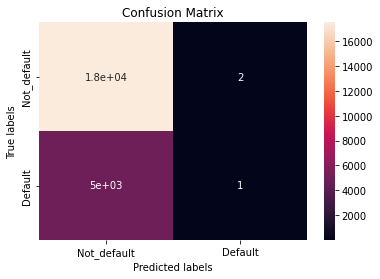

In [65]:
labels = ['Not_default', 'Default']
matrix = confusion_matrix(Y_train,pred_train)
print(matrix)

ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##  Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
X = df.drop(['default payment next month'],axis=1)
y = df['default payment next month']

In [68]:
rf_clfn = RandomForestClassifier()
rf_clfn.fit(X_train,Y_train)

RandomForestClassifier()

In [69]:
train_class_preds = rf_clfn.predict(X_train)
test_class_preds = rf_clfn.predict(X_test)
train_accuracy_rf = accuracy_score(train_class_preds,Y_train)
test_accuracy_rf = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)


The accuracy on train data is  0.9999555555555556
The accuracy on test data is  0.8158666666666666


In [70]:
test_accuracy_rf = accuracy_score(test_class_preds,Y_test)
test_precision_score_rf = precision_score(test_class_preds,Y_test)
test_recall_score_rf = recall_score(test_class_preds,Y_test)
test_f1_score_rf = f1_score(test_class_preds,Y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,Y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8158666666666666
The precision on test data is  0.3609112709832134
The recall on test data is  0.6564885496183206
The f1 on test data is  0.46576402321083166
The roc_score on test data is  0.7472781499420784


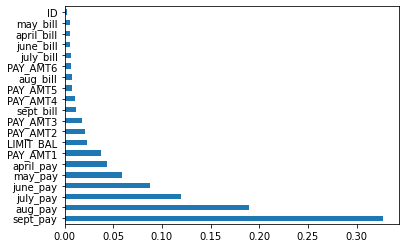

In [71]:
rf_org = RandomForestClassifier(max_leaf_nodes =20, max_depth=20, n_estimators=200,random_state = 20).fit(X_train, Y_train)
feat_importances = pd.Series(rf_org.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

##  KNN